<a href="https://colab.research.google.com/github/Belvanz/proyek-klasifikasi-gambar/blob/main/Proyek_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Klasifikasi Gambar Shoe vs Sandal vs Boot**

**Sumber Dataset :**
https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images


### **Import Libraries**

In [1]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 105.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 73.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: ml_dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found exi

In [2]:
# Import Library
# Library yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm as tq
import subprocess

In [3]:
# Libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

In [4]:
# Libraries untuk pembangunan model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

### **Data Loading**

In [5]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nejieagle","key":"06e0116e7156ba0431710110a67fbaf0"}'}

In [6]:
# Download kaggle dataset and unzip the file
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images
!unzip shoe-vs-sandal-vs-boot-dataset-15k-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (10).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (100).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1000).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1001).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1002).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1003).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1004).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1005).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1006).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1007).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1008).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (1009).jpg  
  inflating: Shoe vs Sandal vs Boot Dataset/Shoe/Shoe (101).jpg  
  inflating: Shoe 

In [7]:
import os
import shutil

In [8]:
train_dir = '/content/Shoe vs Sandal vs Boot/train'
val_dir = '/content/Shoe vs Sandal vs Boot/val'
test_dir = '/content/Shoe vs Sandal vs Boot/test'

# Membuat folder baru untuk train, val, test
for folder in [train_dir, val_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)
    for category in ['Shoe', 'Sandal', 'Boot']:
        os.makedirs(os.path.join(folder, category), exist_ok=True)

In [9]:
print("Training set:", os.listdir(train_dir))
print("Testing set:", os.listdir(test_dir))
print("Validation set:", os.listdir(val_dir))

Training set: ['Shoe', 'Sandal', 'Boot']
Testing set: ['Shoe', 'Sandal', 'Boot']
Validation set: ['Shoe', 'Sandal', 'Boot']


In [10]:
# Path folder gabungan
combined_dir = "Shoe vs Sandal vs Boot/Combined"
os.makedirs(combined_dir, exist_ok=True)

# Gabungkan semua gambar ke dalam satu folder
for dataset_dir in [train_dir, val_dir, test_dir]:
    for class_name in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_name)
        combined_class_path = os.path.join(combined_dir, class_name)
        os.makedirs(combined_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            src = os.path.join(class_path, img_name)
            dst = os.path.join(combined_class_path, img_name)
            shutil.copy2(src, dst)

print("Dataset berhasil digabungkan ke dalam:", combined_dir)

Dataset berhasil digabungkan ke dalam: Shoe vs Sandal vs Boot/Combined


In [11]:
data_dir = "/content/Shoe vs Sandal vs Boot"
img_size = (128, 128)
batch_size = 32

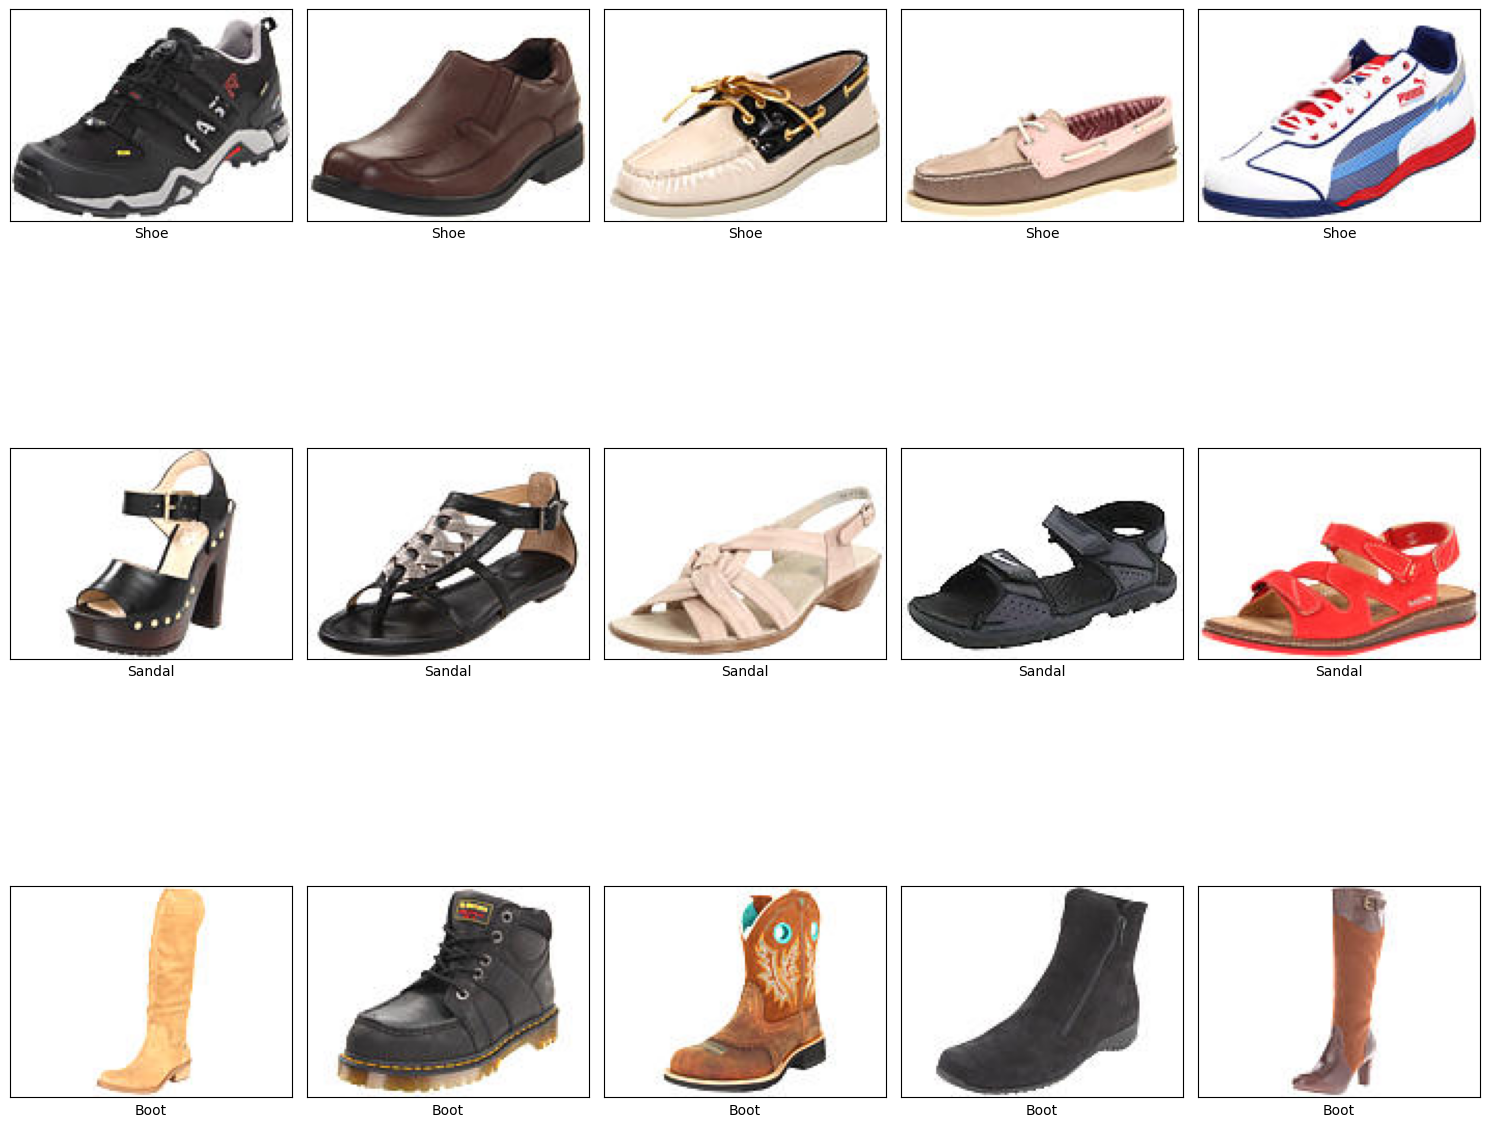

In [12]:
import matplotlib.pyplot as plt

# Membuat kamus yang menyimpan gambar untuk setiap kelas dalam data
shoes_images = {}
path_sub = "/content/Shoe vs Sandal vs Boot Dataset"

for class_name in os.listdir(path_sub):
    class_dir = os.path.join(path_sub, class_name)
    if os.path.isdir(class_dir):
        shoes_images[class_name] = os.listdir(class_dir)[:5]  # Ambil 5 gambar pertama

# Menampilkan 5 gambar dari setiap kelas
fig, axs = plt.subplots(len(shoes_images.keys()), 5, figsize=(15, 15))

for i, (class_name, images) in enumerate(shoes_images.items()):
    for j, image_name in enumerate(images):
        img_path = os.path.join(path_sub, class_name, image_name)
        img = Image.open(img_path)
        axs[i, j].imshow(img)
        axs[i, j].set(xlabel=class_name, xticks=[], yticks=[])

fig.tight_layout()
plt.show()

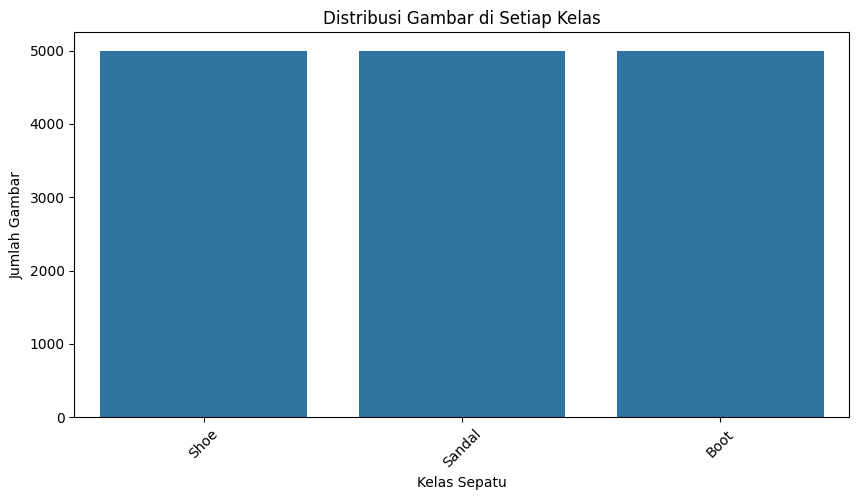

In [13]:
import seaborn as sns
# Plot distribusi gambar di seluruh kelas
class_counts = {class_name: len(os.listdir(os.path.join(path_sub, class_name))) for class_name in shoes_images.keys()}

plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=45)
plt.xlabel("Kelas Sepatu")
plt.ylabel("Jumlah Gambar")
plt.title("Distribusi Gambar di Setiap Kelas")
plt.show()

### **Data Augmentation**

In [14]:
# Data Augmentation
# Membuat fungsi untuk melakukan rotasi berlawanan arah jarum jam
def anticlockwise_rotation(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.rot90(img, k=random.randint(1, 4))  # Rotasi 90, 180, atau 270 derajat secara acak
    return img

# Membuat fungsi untuk melakukan rotasi searah jarum jam
def clockwise_rotation(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.rot90(img, k=random.randint(1, 4))  # Rotasi 90, 180, atau 270 derajat secara acak
    return img

# Membuat fungsi untuk membalik gambar secara vertikal dari atas ke bawah
def flip_up_down(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.flip_up_down(img)
    return img

# Membuat fungsi untuk memberikan efek peningkatan kecerahan pada gambar
def add_brightness(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.adjust_brightness(img, delta=random.uniform(0.1, 0.5))  # Sesuaikan nilai delta sesuai kebutuhan
    return img

# Membuat fungsi untuk memberikan efek blur pada gambar
def blur_image(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.random_blur(img, (3, 3))  # Ukuran kernel blur bisa disesuaikan
    return img

# Membuat fungsi untuk memberikan efek pergeseran acak pada gambar
def sheared(img):
    img = tf.image.resize(img, (224, 224))
    # Buat objek ImageDataGenerator dengan parameter shearing range
    datagen = ImageDataGenerator(shear_range=0.2)
    img = next(iter(datagen.flow(tf.expand_dims(img, 0))))[0]
    return img

# Membuat fungsi untuk melakukan pergeseran melengkung pada gambar
def warp_shift(img):
    img = tf.image.resize(img, (224, 224))
    # Buat objek ImageDataGenerator dengan parameter width_shift_range dan height_shift_range
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)
    img = next(iter(datagen.flow(tf.expand_dims(img, 0))))[0]
    return img

def add_blur(img):
    img = cv2.GaussianBlur(np.array(img), (5,5), 0)
    return img

In [15]:
# Augmentasi tambahan dengan penyimpanan gambar hasil augmentasi
transformations = {
    'rotate anticlockwise': anticlockwise_rotation,
    'flip up down': flip_up_down,
    'add brightness': add_brightness,
    'blurring image': add_blur
}

images_path = "Shoe vs Sandal vs Boot Dataset"
dest_path = "Shoes Dataset/Augmented"
os.makedirs(dest_path, exist_ok=True)

# Get all image files recursively
images = []
for root, _, files in os.walk(images_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            images.append(os.path.join(root, file))

images_to_generate = 2000
counter = 1

while counter <= images_to_generate:
    image_path = random.choice(images)
    try:
        original_image = io.imread(image_path)
        transformed_image = original_image
        for _ in range(random.randint(1, len(transformations))):
            key = random.choice(list(transformations.keys()))
            transformed_image = transformations[key](transformed_image)

        new_image_path = f"{dest_path}/augmented_image_{counter}.jpg"
        transformed_image = img_as_ubyte(transformed_image)
        cv2.imwrite(new_image_path, transformed_image)
        counter += 1
    except ValueError as e:
        print('Could not read or process the image', image, ':', e, 'hence skipping it.')

Streaming output truncated to the last 5000 lines.
Could not read or process the image <module 'keras._tf_keras.keras.preprocessing.image' from '/usr/local/lib/python3.11/dist-packages/keras/_tf_keras/keras/preprocessing/image/__init__.py'> : Images of type float must be between -1 and 1. hence skipping it.
Could not read or process the image <module 'keras._tf_keras.keras.preprocessing.image' from '/usr/local/lib/python3.11/dist-packages/keras/_tf_keras/keras/preprocessing/image/__init__.py'> : Images of type float must be between -1 and 1. hence skipping it.
Could not read or process the image <module 'keras._tf_keras.keras.preprocessing.image' from '/usr/local/lib/python3.11/dist-packages/keras/_tf_keras/keras/preprocessing/image/__init__.py'> : Images of type float must be between -1 and 1. hence skipping it.
Could not read or process the image <module 'keras._tf_keras.keras.preprocessing.image' from '/usr/local/lib/python3.11/dist-packages/keras/_tf_keras/keras/preprocessing/image

### **Data Splitting: Train, Test, Validation**

In [16]:
# Mengumpulkan semua path gambar dan labelnya
file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(path_sub):
    for name in files:
        full_path.append(os.path.join(path, name))
        labels.append(path.split('/')[-1])
        file_name.append(name)

df = pd.DataFrame({"path": full_path, "file_name": file_name, "labels": labels})

In [17]:
# Membagi dataset menjadi train (80%), valid (10%), test (10%)
X = df['path']
y = df['labels']
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [18]:
# Menyatukan ke dalam masing-masing dataframe
df_train = pd.DataFrame({'path': X_train, 'labels': y_train, 'set': 'train'})
df_valid = pd.DataFrame({'path': X_valid, 'labels': y_valid, 'set': 'valid'})
df_test = pd.DataFrame({'path': X_test, 'labels': y_test, 'set': 'test'})

In [19]:
# Gabungkan DataFrame df_train, df_valid, dan df_test
df_all = pd.concat([df_train, df_valid, df_test], ignore_index=True)

print(df_all.groupby(['set', 'labels']).size(), '\n')

set    labels
test   Boot       500
       Sandal     500
       Shoe       500
train  Boot      4000
       Sandal    4000
       Shoe      4000
valid  Boot       500
       Sandal     500
       Shoe       500
dtype: int64 



In [20]:
# Fungsi untuk menyimpan dataset ke dalam folder
def save_dataset(df, dataset_path):
    for index, row in tq(df.iterrows()):
        file_path = row['path']
        label_path = os.path.join(dataset_path, row['set'], row['labels'])
        os.makedirs(label_path, exist_ok=True)
        file_dest = os.path.join(label_path, os.path.basename(file_path))
        if not os.path.exists(file_dest):
            shutil.copy2(file_path, file_dest)

In [21]:
# Menyimpan dataset ke dalam direktori yang telah dibuat
dataset_final = '/content/Shoes_Dataset_Final'
save_dataset(df_all, dataset_final)

print(f"Training data: {len(df_train)} images saved in {train_dir}")
print(f"Validation data: {len(df_valid)} images saved in {val_dir}")
print(f"Testing data: {len(df_test)} images saved in {test_dir}")


0it [00:00, ?it/s]

Training data: 12000 images saved in /content/Shoe vs Sandal vs Boot/train
Validation data: 1500 images saved in /content/Shoe vs Sandal vs Boot/val
Testing data: 1500 images saved in /content/Shoe vs Sandal vs Boot/test


### **Image Data Generator**

In [22]:
# Melakukan pra-pemrosesan dan augmentasi gambar
train_dir = '/content/Shoes_Dataset_Final/train'
valid_dir = '/content/Shoes_Dataset_Final/valid'
test_dir = '/content/Shoes_Dataset_Final/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

valid_test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224,224), batch_size=32, class_mode='categorical', shuffle=True,
    color_mode='rgb'
)

valid_generator = valid_test_datagen.flow_from_directory(
    valid_dir, target_size=(224,224), batch_size=32, class_mode='categorical', shuffle=False,
    color_mode='rgb'
)

test_generator = valid_test_datagen.flow_from_directory(
    test_dir, target_size=(224,224), batch_size=1, class_mode='categorical', shuffle=False,
    color_mode='rgb'
)

Found 12000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


### **Modelling**

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Activation

# Bersihkan sesi Keras
tf.keras.backend.clear_session()

# Inisialisasi model Sequential
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2)))

# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2)))

# Flatten layer
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

# Output Layer (Sigmoid untuk klasifikasi biner)
model.add(Dense(3, activation='softmax'))

# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │              

 Total params: 12,948,547 (49.39 MB)

 Trainable params: 12,947,715 (49.39 MB)

 Non-trainable params: 832 (3.25 KB)

In [24]:
# Compile Model dengan Learning Rate Scheduling
initial_learning_rate = 0.001
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=initial_learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=30,
    callbacks=[lr_schedule, early_stopping]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 172s 428ms/step - accuracy: 0.5672 - loss: 0.9438 - val_accuracy: 0.4807 - val_loss: 0.9977 - learning_rate: 0.0010
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 159s 424ms/step - accuracy: 0.6903 - loss: 0.7001 - val_accuracy: 0.7680 - val_loss: 0.5341 - learning_rate: 0.0010
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 159s 425ms/step - accuracy: 0.7204 - loss: 0.6477 - val_accuracy: 0.3333 - val_loss: 2.2537 - learning_rate: 0.0010
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 201s 424ms/step - accuracy: 0.7496 - loss: 0.6068 - val_accuracy: 0.6873 - val_loss: 0.7257 - learning_rate: 0.0010
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - accuracy: 0.7652 - loss: 0.5699
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
375/375 ━━━━━━━━━━━━━━━━━━━━ 158s 422ms/step - accuracy: 0.7652 - loss: 0.5700 - val_accuracy: 0.4893 - val_loss: 1.1718 - learning_rate: 0.0010
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 159s 424ms/step - accuracy

In [25]:
import json
from google.colab import drive

# Hubungkan Google Colab ke Google Drive
drive.mount('/content/drive')

# Simpan History Training
history_path = "/content/drive/My Drive/training_history.json"
with open(history_path, 'w') as f:
    json.dump(history.history, f)

# Simpan Model
model_path = "/content/drive/My Drive/shoe_classifier.h5"
model.save(model_path)

print("Training history dan model berhasil disimpan")

Mounted at /content/drive


Training history dan model berhasil disimpan


In [26]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Tentukan ukuran gambar sesuai input model
img_size = (224, 224)

# Load dan konversi semua gambar ke array
X_test_array = np.array([img_to_array(load_img(img_path, target_size=img_size)) for img_path in X_test])

# Normalisasi (jika model memerlukan normalisasi 0-1)
X_test_array = X_test_array / 255.0

print("Shape X_test_array:", X_test_array.shape)


Shape X_test_array: (1500, 224, 224, 3)


In [27]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Konversi label kategori ke angka
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)  # Mengubah label ke angka (0,1,2)

print("Label yang dikodekan:", y_test_encoded[:10])  # Cek hasil encoding

# Konversi ke one-hot encoding
num_classes = len(label_encoder.classes_)  # Jumlah kelas berdasarkan label unik
y_test_one_hot = to_categorical(y_test_encoded, num_classes)

print("Shape y_test_one_hot:", y_test_one_hot.shape)


Label yang dikodekan: [2 1 0 2 2 2 2 2 2 2]
Shape y_test_one_hot: (1500, 3)


In [28]:
test_loss, test_acc = model.evaluate(X_test_array, y_test_one_hot)
print("Testing Accuracy:", test_acc)


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9540 - loss: 0.1295
Testing Accuracy: 0.949999988079071


In [29]:
# Simpan hasil testing
test_results = {'test_loss': test_loss, 'test_accuracy': test_acc}

with open('/content/drive/My Drive/testing_results.json', 'w') as f:
    json.dump(test_results, f)

print("Hasil testing berhasil disimpan")

Hasil testing berhasil disimpan


In [30]:
model_path = '/content/drive/My Drive/shoe_classifier.h5'
history_path = '/content/drive/My Drive/training_history.json'
test_results_path = '/content/drive/My Drive/testing_results.json'

# Muat Model dan Data Training/Testing Kembali
model = tf.keras.models.load_model(model_path)

with open(history_path, 'r') as f:
    history = json.load(f)

with open(test_results_path, 'r') as f:
    test_results = json.load(f)

print("Model dan hasil training/testing berhasil dimuat")
print("Akurasi Testing (Loaded):", test_results['test_accuracy'])

Model dan hasil training/testing berhasil dimuat
Akurasi Testing (Loaded): 0.949999988079071


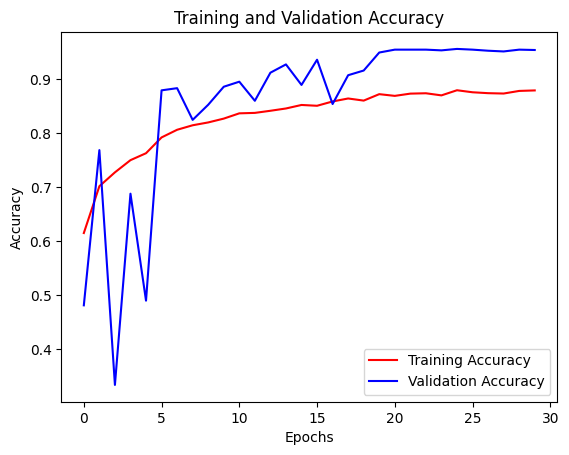

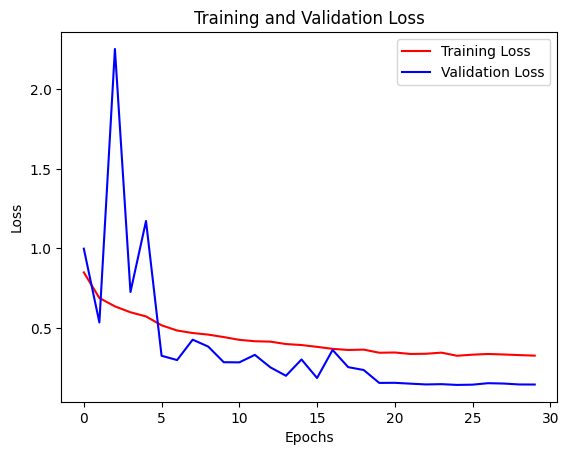

In [31]:
import matplotlib.pyplot as plt

acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(acc))

# Plot Akurasi
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
# Pastikan folder sudah ada
import os
os.makedirs("saved_model", exist_ok=True)
os.makedirs("tflite", exist_ok=True)
os.makedirs("tfjs_model", exist_ok=True)

In [33]:
# Simpan dalam format SavedModel
import tensorflow as tf

# Simpan model dalam format SavedModel
model.export("saved_model")


Saved artifact at 'saved_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135080547428752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135080547424336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135080547428944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135080547425104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135080547431248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135080547424144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135080547426640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135080547427600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135080547428560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135080547425296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135080547426064: Ten

In [34]:
import tensorflow as tf
import os

# Load model dari format SavedModel
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model")

# Konversi model ke TFLite
tflite_model = converter.convert()

# Simpan model TFLite ke dalam folder 'tflite'
with open("tflite/model.tflite", "wb") as f:
    f.write(tflite_model)

# Simpan label ke dalam folder 'tflite'
labels = ["Boot", "Sandal", "Shoe"]
with open("tflite/label.txt", "w") as f:
    f.write("\n".join(labels))

print("Model berhasil dikonversi dan disimpan di folder 'tflite/' ")


Model berhasil dikonversi dan disimpan di folder 'tflite/' 


In [35]:
import tensorflowjs as tfjs

# Simpan model ke dalam folder "tfjs_model"
tfjs.converters.save_keras_model(model, "tfjs_model")

failed to lookup keras version from the file,
    this is likely a weight only file
